Group 12

Anakha Krishnavilasom Gopalakrishnan - 8 hours

Daniel Juster - 8 hours

#DAT405/DIT407 Introduction to Data Science and AI
## 2022-2023, Reading Period 4
## Assignment 7

Neural Networks using Keras and Tensorflow.
Please see the associated document for questions.
If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs. *kursiv text*

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt



In [ ]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10
img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [ ]:
x_train = x_train.astype('float32') # Convert training data type to float32 so, in the next step, we can use "/".
x_test = x_test.astype('float32')   # Convert test data type to float32 so, in the next step, we can use "/".

x_train /= 255 # 0-255 is a lot of versions of grey, so make it "boolean" by dividing with 255. Now it is white or black only.
x_test /= 255  # 0-255 is a lot of versions of grey, so make it "boolean" by dividing with 255. Now it is white or black only.

# "to_categorical" creates a matrix with only zeros and one 1 that are unique. These are called "one-hot encoding". 
# num_classes is already set to 10 (0-9), so we will get unique 10 matrixes.
# We do this for lbl_train and lbl_test
y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes) 
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


In [ ]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs= epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 7s 12ms/step - loss: 0.4714 - accuracy: 0.8671 - val_loss: 0.2524 - val_accuracy: 0.9278
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2231 - accuracy: 0.9359 - val_loss: 0.1903 - val_accuracy: 0.9434
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1722 - accuracy: 0.9496 - val_loss: 0.1555 - val_accuracy: 0.9525
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1434 - accuracy: 0.9577 - val_loss: 0.1352 - val_accuracy: 0.9582
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1225 - accuracy: 0.9639 - val_loss: 0.1166 - val_accuracy: 0.9656
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1073 - accuracy: 0.9686 - val_loss: 0.1065 - val_accuracy: 0.9682
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0946 - accuracy: 0.9716 - val_loss: 0.1219 - val_accuracy: 0.9639


## 1 Pre-processing
**1.1. Explain the data pre-processing highlighted in the notebook**

**1.1 Answer:**

See comments above...

## 2 Network model, training, and changing hyper-parameters


**2.1.1  How many layers does the network in the notebook have?** 

**2.1.2 How many neurons does each layer have?** 

**2.1.3 What activation functions?**

**2.1.4 and why are these appropriate for this application?** 

**2.1.5 What is the total number of parameters for the network?** 

**2.1.6 Why do the input and output layers have the dimensions they have?** 

 
**Answers:** 

See comments ad text below.


**2.1.1  How many layers does the network in the notebook have?** 

We know for sure that we have 3 types layers: Input, hidden and output. 
We can create e.g 2 hidden layers with the first one taking a input shape of 28x28 = 784 elements and connecting them all together with Dense.
Sequential is good for image classification

**2.1.2 How many neurons does each layer have?** 

The batchsize is set to 128, so we use 64 neurons for each hiden layer.


**2.1.3 What activation functions?**

**2.1.4 and why are these appropriate for this application?**

We use relu for the hidden layers to active when input is "1",  
3and softmax for the output layer to activate probability that altogether sums up to 1.


**2.1.5 What is the total number of parameters for the network?** 

Using the model.summary(), we get more information, including the total numbers of parameters (weights and bias) = 55050


**2.1.6 Why do the input and output layers have the dimensions they have?**

The input dimension is 28x28 as this is the number of pixels, and the output is 10, equal to number of digits.

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64, activation='relu')) # Hidden layer 1
model.add(Dense(64, activation='relu'))                     # Hidden layer 2
model.add(Dense(10, activation='softmax'))                  # Output layer  

# print the summary of the model
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_45 (Dense)            (None, 64)                50240     
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dense_47 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


**2.2.1 What loss function is used to train the network?** 

**2.2.1 Answer:**

Using softmax on output layer indicates that we should use the default loss-function: categorical_crossentropy. It is designed for one-hot encoding.


**2.2.2 What is the functional form (a mathematical expression) of the loss function?** 

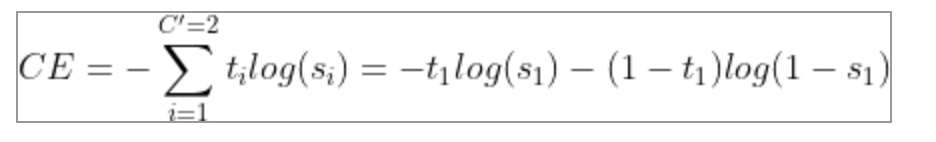

Ref. https://gombru.github.io/2018/05/23/cross_entropy_loss/





**2.2.3 and how should we interpret it?** 

**2.2.3 Answer:**

In our case, 
Si = the softmax function = p
i range from 1-10 
ti is the one hot encoded value (0 or 1)

So, for a 3, we get

losscse =  - (0*log(p1) + 0*log(p2) + 1*log(p3) + 0*log(p4) +... 0*log(p10) )



**2.2.4 Why is it appropriate for the problem at hand?**

**2.2.4 Answer:**

This will have a bigger impact on bigger errors so the learning will improve.


**2.3. Train the network for 10 epochs and plot the training and validation accuracy for each epoch.**

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
batch_size = 128
epochs = 10


history = model.fit(x_train, y_train, 
          batch_size = batch_size, 
          epochs = epochs, 
          verbose = 1, # yes, print progress bar. This takes time....
          validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.4141 - accuracy: 0.1683 - val_loss: 0.3190 - val_accuracy: 0.2971
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3066 - accuracy: 0.4475 - val_loss: 0.2927 - val_accuracy: 0.5506
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2804 - accuracy: 0.5983 - val_loss: 0.2657 - val_accuracy: 0.6402
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2539 - accuracy: 0.6669 - val_loss: 0.2389 - val_accuracy: 0.6954
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2280 - accuracy: 0.7114 - val_loss: 0.2134 - val_accuracy: 0.7366
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2038 - accuracy: 0.7471 - val_loss: 0.1904 - val_accuracy: 0.7684
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1828 - accuracy: 0.7740 - val_loss: 0.1712 - val_accuracy: 0.7956
Ep

In [ ]:
print("Accuracy:",model.evaluate(x_test, y_test)[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1345 - accuracy: 0.8360
Accuracy: 0.8360000252723694


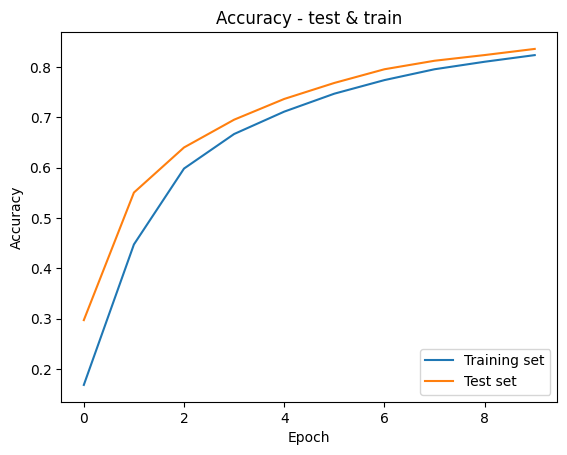

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy - test & train')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='lower right')
plt.show()

**2.4 Aswers**

See commets ad text below.

In [ ]:
# [2.4. Update the model to implement a three-layer neural network 
# where the hidden layers have 500 and 300 hidden units respectively. 
# -------------------------------------------------------------------

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(500, activation='relu')) # Hidden layer 1
model.add(Dense(300, activation='relu'))                     # Hidden layer 2
model.add(Dense(10, activation='softmax'))                  # Output layer  

# print the summary of the model
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 500)               392500    
                                                                 
 dense_49 (Dense)            (None, 300)               150300    
                                                                 
 dense_50 (Dense)            (None, 10)                3010      
                                                                 
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2.4 Train for 40 epochs. 
#------------------------


epochs = 40

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
          batch_size= batch_size, 
          epochs=epochs, 
          verbose=1, # yes, print progress bar. This takes time....
          validation_data=(x_test, y_test))

print("Accuracy:",model.evaluate(x_test, y_test)[1])



Epoch 1/40
469/469 [==============================] - 9s 18ms/step - loss: 0.3654 - accuracy: 0.3306 - val_loss: 0.2954 - val_accuracy: 0.5842
Epoch 2/40
469/469 [==============================] - 7s 14ms/step - loss: 0.2758 - accuracy: 0.6663 - val_loss: 0.2531 - val_accuracy: 0.7340
Epoch 3/40
469/469 [==============================] - 8s 17ms/step - loss: 0.2357 - accuracy: 0.7476 - val_loss: 0.2142 - val_accuracy: 0.7812
Epoch 4/40
469/469 [==============================] - 6s 14ms/step - loss: 0.2008 - accuracy: 0.7835 - val_loss: 0.1829 - val_accuracy: 0.8056
Epoch 5/40
469/469 [==============================] - 8s 17ms/step - loss: 0.1742 - accuracy: 0.8057 - val_loss: 0.1601 - val_accuracy: 0.8203
Epoch 6/40
469/469 [==============================] - 7s 14ms/step - loss: 0.1550 - accuracy: 0.8208 - val_loss: 0.1438 - val_accuracy: 0.8363
Epoch 7/40
469/469 [==============================] - 8s 17ms/step - loss: 0.1409 - accuracy: 0.8329 - val_loss: 0.1315 - val_accuracy: 0.8477

**2.4 What is the best validation accuracy you can achieve?**

The best is 0.9205


In [ ]:
# 2.4 Implement weight decay on hidden units and train and select 5 regularization factors from 0.000001 to 0.001.  
# Train 3 replicates networks for each regularization factor. 

from keras import regularizers
import numpy as np

# Set some numbers
batch_size=32
epochs = 10 # We elaborated with smaler numbers since the calculation took a long time. We used 1 this time.
reg_factors = np.linspace(0.000001, 0.001, 5)
replicas = 3

accuracies = {}
for l2_factor in reg_factors:
    regularizer = regularizers.l2(l2_factor)
    print('Regularization factor:', l2_factor)
    accuracies[l2_factor] = []
    for replica in range(replicas):
        print ({replica})
        model = Sequential()
        model.add(Flatten(input_shape=(28,28)))
        model.add(Dense(500, activation='relu', kernel_regularizer=regularizer)) # Hidden layer 1
        model.add(Dense(300, activation='relu'))                     # Hidden layer 2
        model.add(Dense(10, activation='softmax'))                  # Output layer  

        model.compile(
            loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.SGD(learning_rate=0.1),
            metrics=['accuracy'])

        fit = model.fit(x_train, y_train, 
                        batch_size=batch_size, 
                        epochs=epochs, 
                        verbose=1, # yes, print progress bar. This takes time....
                        validation_data=(x_test, y_test))

        val_accuracy = fit.history['val_accuracy'][-1]  # take the last validation accuracy
        accuracies[l2_factor].append(val_accuracy)


Regularization factor: 1e-06
{0}
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2472 - accuracy: 0.9264 - val_loss: 0.1306 - val_accuracy: 0.9595
{1}
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2484 - accuracy: 0.9269 - val_loss: 0.1200 - val_accuracy: 0.9623
{2}
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2470 - accuracy: 0.9259 - val_loss: 0.1173 - val_accuracy: 0.9661
Regularization factor: 0.00025075000000000005
{0}
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3973 - accuracy: 0.9260 - val_loss: 0.2649 - val_accuracy: 0.9637
{1}
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3937 - accuracy: 0.9265 - val_loss: 0.2676 - val_accuracy: 0.9605
{2}
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3945 - accuracy: 0.9256 - val_loss: 0.2501 - val_accuracy: 0.9654
Regularization factor: 0.0005005000000000001
{0}
1875/1875 [==============================] - 18

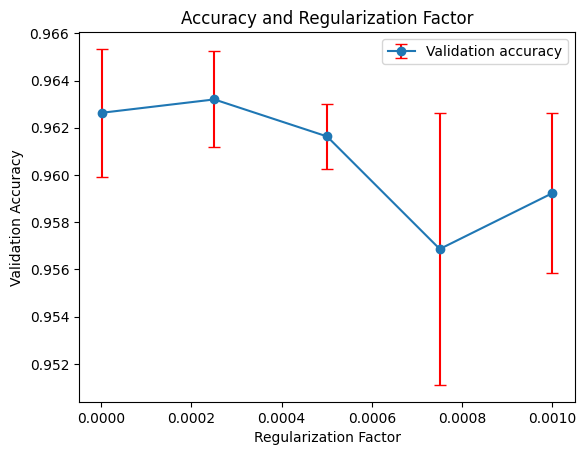

In [ ]:
# Plot-time
import matplotlib.pyplot as plt

# calculate mean and std of validation accuracies for each regularization factor
mean_acc = [np.mean(accs) for accs in accuracies.values()]
std_acc = [np.std(accs) for accs in accuracies.values()]

# Use error-bars
plt.errorbar(reg_factors, mean_acc, yerr=std_acc, label="Validation accuracy", fmt='-o', ecolor='r', capsize=4)

plt.title("Accuracy and Regularization Factor")
plt.xlabel("Regularization Factor")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
# 2.4 How close do you get to Hintons result? 

# Round values in mean_acc to 4 decimals and pick the biggest(max). Calculate %
max_acc = max(round(acc, 4) for acc in mean_acc) 
hinton_max = 0.9847
compared_proc = 100* (hinton_max-max_acc)/hinton_max


print(f'Max accuracy: {max_acc}')
print(f'Max accuracy according to Hinton: {hinton_max}')
print(f'Accuracy compared to Hinton: {hinton_max-max_acc:.4f}')
print(f'Accuracy compared to Hinton %: {compared_proc:.2f}')


Max accuracy: 0.9632
Max accuracy according to Hinton: 0.9847
Accuracy compared to Hinton: 0.0215
Accuracy compared to Hinton %: 2.18


**2.4 Final reflection**

*If you do not get the same results, what factors may influence this? (hint: What information is not given by Hinton on the MNIST database that may influence Model training).*

**Answer:**

The result is not the same.

We do know all details regarding Hintons setup, so we can only speculate:
- Number of hidden layers might be different. More might give better accuracy, but also might be overfitting only.
- Increasing the batch and number of hidden units per hidden layer might give us a better accuracy
- Hinton might have used a different activation function. Perhaps relu/softmax isn't the best.
- Same with optimization algorithm. Is our selected SGD the best?
- More epochs might have an impact.





##3 Convolutional layers


3.1. Design a model that makes use of at least one convolutional layer – how performant a model can you get? -- According to the MNIST database it should be possible reach to 99% accuracy on the validation data. If you choose to use any layers apart from the convolutional layers and layers that you used in previous questions, you must describe
what they do. If you do not reach 99% accuracy, report your best performance, and explain your attempts and thought process.

3.2. Discuss the differences and potential benefits of using convolutional layers over fully connected ones for the application?

In [ ]:
# 3.1. Design a model that makes use of at least one convolutional layer

batch_size = 32 
epochs = 40 # We elaborated with smaler numbers since the calculation took a long time. We used 4 this time.

model = Sequential() 

# Adding more layers, using Conv2D ad maxpooling2D
# For Conv2D we test with 32 filters and 3x3 kernel size
# For maxpooling2D we downsize to a pool = 2x2. This will reduce the computational time
# 2 of each
model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

# Now, continue with same layers as earlier. 
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64, activation='relu'))                    # Hidden layer 1
model.add(Dense(64, activation='relu'))                     # Hidden layer 2
model.add(Dense(10, activation='softmax'))                    # Output layer  



model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.SGD(learning_rate=0.1),
    metrics=['accuracy'])

fit = model.fit(x_train, y_train, 
                batch_size=batch_size, 
                epochs=epochs, 
                verbose=1, # yes, print progress bar. This takes time....
                validation_data=(x_test, y_test))

val_accuracy = fit.history['val_accuracy'][-1]  # take the last validation accuracy
accuracies[l2_factor].append(val_accuracy)

Epoch 1/4
1875/1875 [==============================] - 71s 37ms/step - loss: 0.2087 - accuracy: 0.9335 - val_loss: 0.0594 - val_accuracy: 0.9810
Epoch 2/4
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0553 - accuracy: 0.9832 - val_loss: 0.0479 - val_accuracy: 0.9846
Epoch 3/4
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0390 - accuracy: 0.9876 - val_loss: 0.0424 - val_accuracy: 0.9856
Epoch 4/4
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0285 - accuracy: 0.9907 - val_loss: 0.0258 - val_accuracy: 0.9926


In [ ]:
print(f'Max accuracy: {val_accuracy:.4f}')

Max accuracy: 0.9926


**3.2. Discuss the differences and potential benefits of using convolutional layers over fully connected ones for the application?**

**3.2 Answer:**

Convolutional layers are designed to work with images so it makes sense that the accuracy would be better.
We are using 3x3 pixels as filter on the images which is a lot bigger than 28x28. This will simplify and remove noise, so the risk for overfitting should not be a as big as for fully connected layers. 